In [1]:
import quimb.tensor as qtn

from tebd.hamiltonian import LocalIsingHamiltonian
from tebd.hamiltonian import IsingHamiltonian
from tebd.matrix_product_states import MatrixProductState
from tebd.tebd import TEBD

In [2]:
d = 2
N = 5
bond_dim = 10

In [3]:
lmda = 0
loc_ham_ising = LocalIsingHamiltonian(N, lmda)

In [4]:
loc_ham_ising.hamiltonians[0]

[[0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]]

In [5]:
MPS = MatrixProductState(d=2, N=N, bond_dim=bond_dim)

In [6]:
MPS.data

[Tensor(shape=(2, 10), inds=('k0', 'i0'), tags=oset(['state 1'])),
 Tensor(shape=(10, 2, 10), inds=('i0', 'k1', 'i1'), tags=oset(['state 2'])),
 Tensor(shape=(10, 2, 10), inds=('i1', 'k2', 'i2'), tags=oset(['state 3'])),
 Tensor(shape=(10, 2, 10), inds=('i2', 'k3', 'i3'), tags=oset(['state 4'])),
 Tensor(shape=(10, 2), inds=('i3', 'k4'), tags=oset(['state 5']))]

In [7]:
tebd_obj = TEBD(MPS, loc_ham_ising, evol_type='imag')

In [8]:
rho = tebd_obj.mps.rho()
rho

<TensorNetwork(tensors=10, indices=18)>

In [9]:
print(rho)

TensorNetwork([
    Tensor(shape=(2, 10), inds=('k5', 'i4'), tags=oset(['state 1 conj'])),
    Tensor(shape=(10, 2, 10), inds=('i4', 'k6', 'i5'), tags=oset(['state 2 conj'])),
    Tensor(shape=(10, 2, 10), inds=('i5', 'k7', 'i6'), tags=oset(['state 3 conj'])),
    Tensor(shape=(10, 2, 10), inds=('i6', 'k8', 'i7'), tags=oset(['state 4 conj'])),
    Tensor(shape=(10, 2), inds=('i7', 'k9'), tags=oset(['state 5 conj'])),
    Tensor(shape=(2, 10), inds=('k0', 'i0'), tags=oset(['state 1'])),
    Tensor(shape=(10, 2, 10), inds=('i0', 'k1', 'i1'), tags=oset(['state 2'])),
    Tensor(shape=(10, 2, 10), inds=('i1', 'k2', 'i2'), tags=oset(['state 3'])),
    Tensor(shape=(10, 2, 10), inds=('i2', 'k3', 'i3'), tags=oset(['state 4'])),
    Tensor(shape=(10, 2), inds=('i3', 'k4'), tags=oset(['state 5'])),
])


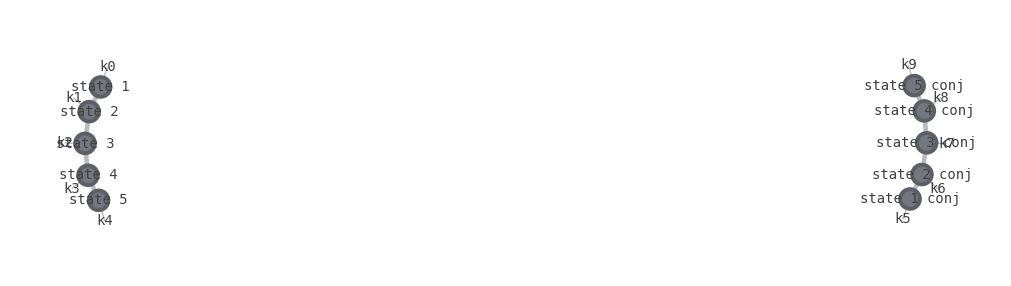

In [10]:
rho.draw(figsize=(10, 10))

In [11]:
rhoC = rho ^ ...

In [12]:
rhoC

Tensor(shape=(2, 2, 2, 2, 2, 2, 2, 2, 2, 2), inds=('k5', 'k6', 'k7', 'k8', 'k9', 'k0', 'k1', 'k2', 'k3', 'k4'), tags=oset(['state 1 conj', 'state 2 conj', 'state 3 conj', 'state 4 conj', 'state 5 conj', 'state 1', 'state 2', 'state 3', 'state 4', 'state 5']))

In [13]:
global_hamiltonian = IsingHamiltonian(N=N, lmda=lmda).hamiltonian

In [14]:
new_inds = tuple([f'k{i}' for i in range(2 * N)])
new_inds

('k0', 'k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9')

In [15]:
ham_tensor = qtn.Tensor(global_hamiltonian, inds=new_inds, tags=['ham'])
rho_tensor = qtn.Tensor(rhoC.data, inds=new_inds, tags=['rho'])
energy_tensor = ham_tensor & rho_tensor
energy = energy_tensor ^ ...

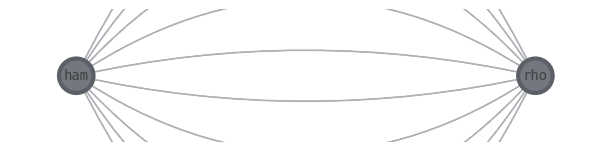

In [16]:
energy_tensor.draw()

In [17]:
energy

10654408.049239548

In [18]:
tau = 0.1

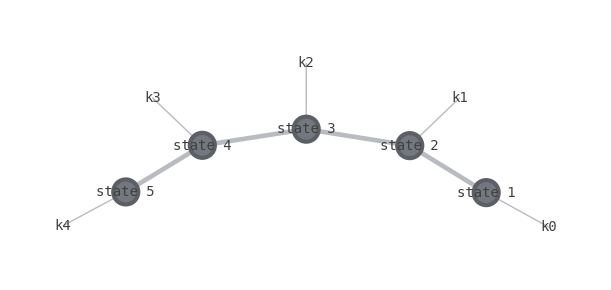

In [19]:
qtn.TensorNetwork(tebd_obj.mps.data).draw()

In [20]:
tebd_obj.step(tau)

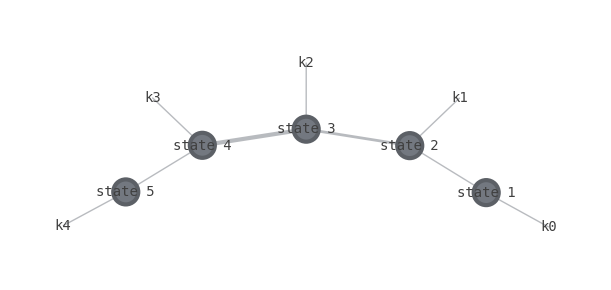

In [21]:
qtn.TensorNetwork(tebd_obj.mps.data).draw()

In [22]:
tebd_obj.step(tau)

In [23]:
tebd_obj.mps.data

[Tensor(shape=(2, 2), inds=('k0', 'i0'), tags=oset(['state 1'])),
 Tensor(shape=(2, 2, 4), inds=('i0', 'k1', 'i1'), tags=oset(['state 2'])),
 Tensor(shape=(4, 2, 4), inds=('i1', 'k2', 'i2'), tags=oset(['state 3'])),
 Tensor(shape=(4, 2, 2), inds=('i2', 'k3', 'i3'), tags=oset(['state 4'])),
 Tensor(shape=(2, 2), inds=('i3', 'k4'), tags=oset(['state 5']))]

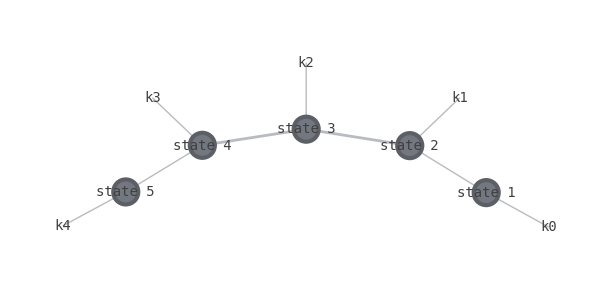

In [24]:
qtn.TensorNetwork(tebd_obj.mps.data).draw()

In [25]:
tebd_obj.step(tau)

In [26]:
tebd_obj.mps.data

[Tensor(shape=(2, 2), inds=('k0', 'i0'), tags=oset(['state 1'])),
 Tensor(shape=(2, 2, 4), inds=('i0', 'k1', 'i1'), tags=oset(['state 2'])),
 Tensor(shape=(4, 2, 4), inds=('i1', 'k2', 'i2'), tags=oset(['state 3'])),
 Tensor(shape=(4, 2, 2), inds=('i2', 'k3', 'i3'), tags=oset(['state 4'])),
 Tensor(shape=(2, 2), inds=('i3', 'k4'), tags=oset(['state 5']))]

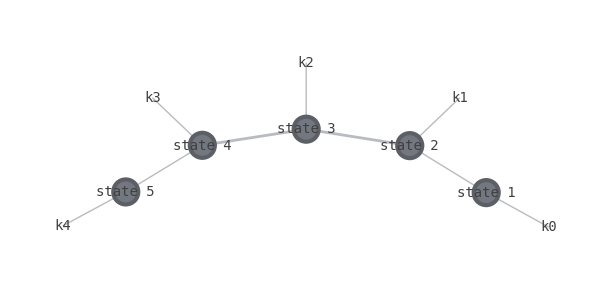

In [27]:
qtn.TensorNetwork(tebd_obj.mps.data).draw()

In [28]:
numiter = 4000

In [29]:
for k in range(numiter):
    tebd_obj.step(tau)

In [30]:
tebd_obj.mps.data

[Tensor(shape=(2, 2), inds=('k0', 'i0'), tags=oset(['state 1'])),
 Tensor(shape=(2, 2, 4), inds=('i0', 'k1', 'i1'), tags=oset(['state 2'])),
 Tensor(shape=(4, 2, 4), inds=('i1', 'k2', 'i2'), tags=oset(['state 3'])),
 Tensor(shape=(4, 2, 2), inds=('i2', 'k3', 'i3'), tags=oset(['state 4'])),
 Tensor(shape=(2, 2), inds=('i3', 'k4'), tags=oset(['state 5']))]

In [31]:
rho = tebd_obj.mps.rho()
rhoC = rho ^ ...
ham_tensor = qtn.Tensor(global_hamiltonian, inds=new_inds, tags=['ham'])
rho_tensor = qtn.Tensor(rhoC.data, inds=new_inds, tags=['rho'])
energy_tensor = ham_tensor & rho_tensor
energy = energy_tensor ^ ...

In [32]:
energy

1245.1773752764568